#ModelA

Using device: cuda
Using 2 worker processes for data loading


Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 83.9MB/s]
Epoch 1/50: 100%|██████████| 34/34 [03:44<00:00,  6.59s/it]


Epoch 1: Train Loss=1.3049, Val Loss=2.0573, Train Acc=59.91%, Val Acc=70.37%


Epoch 2/50: 100%|██████████| 34/34 [00:12<00:00,  2.63it/s]


Epoch 2: Train Loss=0.8457, Val Loss=0.8417, Train Acc=72.31%, Val Acc=77.04%


Epoch 3/50: 100%|██████████| 34/34 [00:12<00:00,  2.62it/s]


Epoch 3: Train Loss=0.6598, Val Loss=6.9431, Train Acc=80.56%, Val Acc=71.85%


Epoch 4/50: 100%|██████████| 34/34 [00:12<00:00,  2.67it/s]


Epoch 4: Train Loss=0.4822, Val Loss=0.5206, Train Acc=84.91%, Val Acc=84.44%


Epoch 5/50: 100%|██████████| 34/34 [00:13<00:00,  2.59it/s]


Epoch 5: Train Loss=0.4133, Val Loss=0.3655, Train Acc=87.96%, Val Acc=88.15%


Epoch 6/50: 100%|██████████| 34/34 [00:12<00:00,  2.67it/s]


Epoch 6: Train Loss=0.2912, Val Loss=0.3803, Train Acc=90.09%, Val Acc=89.26%


Epoch 7/50: 100%|██████████| 34/34 [00:12<00:00,  2.82it/s]


Epoch 7: Train Loss=0.3124, Val Loss=0.5237, Train Acc=91.02%, Val Acc=88.15%


Epoch 8/50: 100%|██████████| 34/34 [00:12<00:00,  2.71it/s]


Epoch 8: Train Loss=0.3663, Val Loss=2.3963, Train Acc=89.72%, Val Acc=72.59%


Epoch 9/50: 100%|██████████| 34/34 [00:13<00:00,  2.61it/s]


Epoch 9: Train Loss=0.2951, Val Loss=0.2880, Train Acc=91.02%, Val Acc=90.37%


Epoch 10/50: 100%|██████████| 34/34 [00:13<00:00,  2.59it/s]


Epoch 10: Train Loss=0.3088, Val Loss=0.4142, Train Acc=90.74%, Val Acc=87.04%


Epoch 11/50: 100%|██████████| 34/34 [00:12<00:00,  2.62it/s]


Epoch 11: Train Loss=0.2075, Val Loss=0.1840, Train Acc=94.26%, Val Acc=94.44%


Epoch 12/50: 100%|██████████| 34/34 [00:13<00:00,  2.57it/s]


Epoch 12: Train Loss=0.2169, Val Loss=0.2252, Train Acc=92.69%, Val Acc=94.07%


Epoch 13/50: 100%|██████████| 34/34 [00:13<00:00,  2.56it/s]


Epoch 13: Train Loss=0.1734, Val Loss=0.1585, Train Acc=95.00%, Val Acc=95.56%


Epoch 14/50: 100%|██████████| 34/34 [00:12<00:00,  2.64it/s]


Epoch 14: Train Loss=0.1570, Val Loss=0.2296, Train Acc=95.46%, Val Acc=91.11%


Epoch 15/50: 100%|██████████| 34/34 [00:12<00:00,  2.74it/s]


Epoch 15: Train Loss=0.1806, Val Loss=0.1714, Train Acc=94.54%, Val Acc=95.19%


Epoch 16/50: 100%|██████████| 34/34 [00:12<00:00,  2.68it/s]


Epoch 16: Train Loss=0.1192, Val Loss=0.1924, Train Acc=96.11%, Val Acc=94.07%


Epoch 17/50: 100%|██████████| 34/34 [00:13<00:00,  2.60it/s]


Epoch 17: Train Loss=0.1505, Val Loss=0.1442, Train Acc=95.74%, Val Acc=95.56%


Epoch 18/50: 100%|██████████| 34/34 [00:13<00:00,  2.59it/s]


Epoch 18: Train Loss=0.1194, Val Loss=0.2312, Train Acc=96.57%, Val Acc=93.33%


Epoch 19/50: 100%|██████████| 34/34 [00:13<00:00,  2.58it/s]


Epoch 19: Train Loss=0.1385, Val Loss=0.2028, Train Acc=95.37%, Val Acc=93.33%


Epoch 20/50: 100%|██████████| 34/34 [00:12<00:00,  2.64it/s]


Epoch 20: Train Loss=0.1289, Val Loss=0.1730, Train Acc=95.83%, Val Acc=95.93%


Epoch 21/50: 100%|██████████| 34/34 [00:13<00:00,  2.55it/s]


Epoch 21: Train Loss=0.0685, Val Loss=0.1993, Train Acc=98.06%, Val Acc=95.93%


Epoch 22/50: 100%|██████████| 34/34 [00:13<00:00,  2.60it/s]


Epoch 22: Train Loss=0.0616, Val Loss=0.2232, Train Acc=98.33%, Val Acc=95.56%
Early stopping triggered.
Model saved as modelA_best.pth
Final Test Accuracy: 95.56%


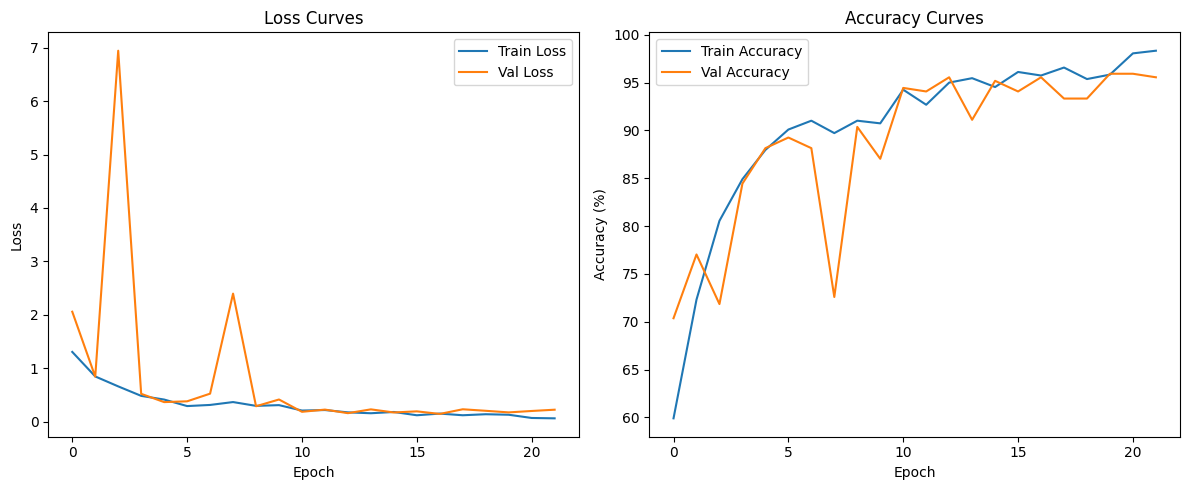

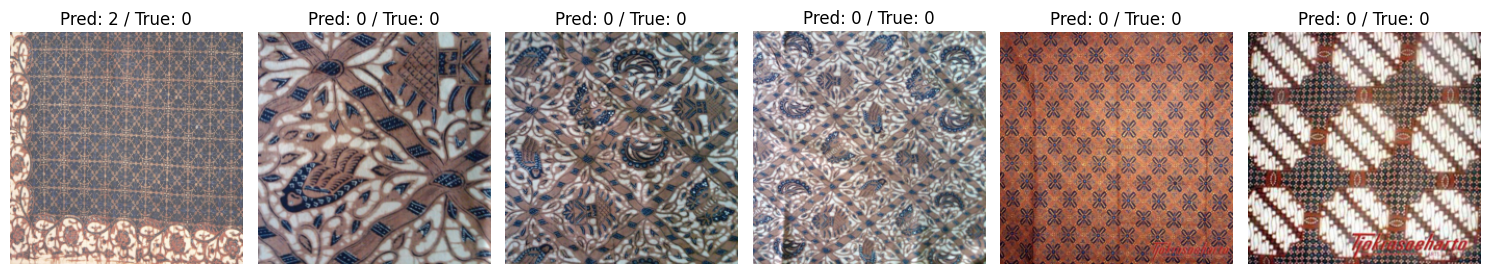

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torchvision.models import ResNet50_Weights
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import os
from tqdm import tqdm
from copy import deepcopy

# Set device - Uses GPU if available, otherwise falls back to CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Hyperparameters configuration
batch_size = 32     # Number of images processed in each training iteration
num_epochs = 50     # Maximum number of complete passes through the training dataset
learning_rate = 0.001  # Step size for optimizer updates
patience = 5        # Number of epochs to wait for improvement before early stopping

# Data directories - paths to the training and test datasets
train_dir = "/content/drive/MyDrive/kuliah (1)/sem6/analisis citra/resnet50-batik/dataset_split/train"
test_dir = "/content/drive/MyDrive/kuliah (1)/sem6/analisis citra/resnet50-batik/test_data"

# Image transformations - preprocessing steps applied to each image
# ResNet50 expects 224x224 pixel images as input
resize_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize all images to 224x224 pixels (ResNet standard input size)
    transforms.ToTensor(),          # Convert PIL images to tensors and normalize pixel values to [0,1]
])

# Create dataset objects - ImageFolder automatically assigns labels based on folder structure
train_dataset = datasets.ImageFolder(root=train_dir, transform=resize_transform)
test_dataset = datasets.ImageFolder(root=test_dir, transform=resize_transform)

# Get the number of available CPU cores for worker configuration
# Use 2 workers as suggested by the warning, or fewer if system has fewer cores
num_workers = min(2, os.cpu_count() or 1)  # Adjust worker count based on warning
print(f"Using {num_workers} worker processes for data loading")

# Create data loaders with appropriate number of workers
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True,
                          num_workers=num_workers, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False,
                         num_workers=num_workers, pin_memory=True)

# Initialize the model - load pre-trained ResNet50 with proper weights syntax
# Using the updated weights parameter instead of the deprecated pretrained parameter
model = models.resnet50(weights=ResNet50_Weights.IMAGENET1K_V1)  # Use explicit weights enum instead of pretrained=True
model.fc = nn.Linear(model.fc.in_features, 6)  # Replace the final fully connected layer for 6 Batik classes
model = model.to(device)  # Move model to GPU or CPU as determined earlier

# Loss function and optimizer configuration
criterion = nn.CrossEntropyLoss()  # Standard loss function for multi-class classification
optimizer = optim.AdamW(model.parameters(), lr=learning_rate)  # AdamW optimizer

# Initialize tracking variables for training progress
train_losses, val_losses = [], []  # Track loss values for plotting
train_accuracies, val_accuracies = [], []  # Track accuracy values for plotting
best_val_loss = float('inf')  # Initialize best validation loss to infinity
epochs_no_improve = 0  # Counter for early stopping

# Training loop with early stopping mechanism
for epoch in range(num_epochs):
    # Set model to training mode - enables dropout, batch normalization updates, etc.
    model.train()
    running_loss = 0.0
    correct, total = 0, 0  # For accuracy calculation

    # Iterate through mini-batches of training data with progress bar
    for inputs, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
        inputs, labels = inputs.to(device), labels.to(device)  # Move data to current device
        optimizer.zero_grad()  # Clear gradients from previous iteration

        outputs = model(inputs)  # Forward pass - get model predictions
        loss = criterion(outputs, labels)  # Calculate loss between predictions and true labels
        loss.backward()  # Backward pass - calculate gradients
        optimizer.step()  # Update model parameters based on gradients

        # Calculate accuracy statistics
        _, predicted = torch.max(outputs.data, 1)  # Get the index of the max log-probability
        total += labels.size(0)  # Increment total number of processed samples
        correct += (predicted == labels).sum().item()  # Count correct predictions
        running_loss += loss.item()  # Accumulate batch loss

    # Calculate epoch-level training metrics
    train_loss = running_loss / len(train_loader)  # Average loss across all batches
    train_acc = 100 * correct / total  # Accuracy as percentage
    train_losses.append(train_loss)  # Store for plotting
    train_accuracies.append(train_acc)  # Store for plotting

    # Validation phase - evaluate model on test data
    model.eval()  # Set model to evaluation mode - disables dropout, fixes batch norm, etc.
    val_loss, correct, total = 0.0, 0, 0
    with torch.no_grad():  # Disable gradient computation for efficiency
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    # Calculate epoch-level validation metrics
    val_loss /= len(test_loader)  # Average validation loss
    val_acc = 100 * correct / total  # Validation accuracy as percentage
    val_losses.append(val_loss)  # Store for plotting
    val_accuracies.append(val_acc)  # Store for plotting

    # Print progress for current epoch
    print(f"Epoch {epoch+1}: Train Loss={train_loss:.4f}, Val Loss={val_loss:.4f}, Train Acc={train_acc:.2f}%, Val Acc={val_acc:.2f}%")

    # Early stopping logic - save best model and check for improvement
    if val_loss < best_val_loss:
        best_val_loss = val_loss  # Update best validation loss
        best_model_state = deepcopy(model.state_dict())  # Save a deep copy of the model state
        epochs_no_improve = 0  # Reset counter
    else:
        epochs_no_improve += 1  # Increment counter when no improvement
        if epochs_no_improve >= patience:
            print("Early stopping triggered.")  # Stop training if no improvement for 'patience' epochs
            break

# Load the best model weights (state with lowest validation loss)
model.load_state_dict(best_model_state)
torch.save(model.state_dict(), "modelA_best.pth")  # Save best model to disk
print("Model saved as modelA_best.pth")

# Final evaluation on test dataset
model.eval()
correct, total = 0, 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Report final test accuracy
print(f"Final Test Accuracy: {100 * correct / total:.2f}%")

# Visualize training process with plots
plt.figure(figsize=(12, 5))

# Plot loss curves
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curves')
plt.legend()

# Plot accuracy curves
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Curves')
plt.legend()

plt.tight_layout()
plt.show()

# Function to visualize model predictions on test data
def visualize_predictions(loader, n=6):
    """
    Visualizes model predictions alongside ground truth labels

    Args:
        loader: DataLoader containing test data
        n: Number of samples to visualize
    """
    data_iter = iter(loader)  # Create iterator from loader
    images, labels = next(data_iter)  # Get a batch of images and labels
    images = images.to(device)  # Move images to current device
    outputs = model(images)  # Get model predictions
    _, preds = torch.max(outputs, 1)  # Get predicted class indices

    # Create visualization grid
    plt.figure(figsize=(15, 4))
    for i in range(n):
        img = images[i].cpu().permute(1, 2, 0).numpy()  # Convert tensor to numpy for display
        plt.subplot(1, n, i + 1)
        plt.imshow(img)  # Display image
        plt.title(f"Pred: {preds[i].item()} / True: {labels[i].item()}")  # Show prediction vs true label
        plt.axis("off")  # Hide axes
    plt.tight_layout()
    plt.show()

# Call visualization function to show sample predictions
visualize_predictions(test_loader)


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#ModelB

Using device: cuda
Using 2 worker processes for data loading


Epoch 1/50: 100%|██████████| 102/102 [12:49<00:00,  7.54s/it]


Epoch 1: Train Loss=1.1299, Val Loss=0.7928, Train Acc=62.00%, Val Acc=70.74%


Epoch 2/50: 100%|██████████| 102/102 [00:37<00:00,  2.69it/s]


Epoch 2: Train Loss=0.7124, Val Loss=0.9570, Train Acc=75.63%, Val Acc=69.63%


Epoch 3/50: 100%|██████████| 102/102 [00:38<00:00,  2.65it/s]


Epoch 3: Train Loss=0.5640, Val Loss=0.7291, Train Acc=81.68%, Val Acc=77.41%


Epoch 4/50: 100%|██████████| 102/102 [00:38<00:00,  2.66it/s]


Epoch 4: Train Loss=0.4597, Val Loss=0.8090, Train Acc=84.28%, Val Acc=75.19%


Epoch 5/50: 100%|██████████| 102/102 [00:39<00:00,  2.61it/s]


Epoch 5: Train Loss=0.4123, Val Loss=0.4244, Train Acc=86.69%, Val Acc=86.30%


Epoch 6/50: 100%|██████████| 102/102 [00:39<00:00,  2.61it/s]


Epoch 6: Train Loss=0.3395, Val Loss=0.2871, Train Acc=88.26%, Val Acc=88.89%


Epoch 7/50: 100%|██████████| 102/102 [00:39<00:00,  2.60it/s]


Epoch 7: Train Loss=0.2860, Val Loss=0.3473, Train Acc=90.15%, Val Acc=90.37%


Epoch 8/50: 100%|██████████| 102/102 [00:38<00:00,  2.64it/s]


Epoch 8: Train Loss=0.2453, Val Loss=0.2759, Train Acc=91.84%, Val Acc=91.11%


Epoch 9/50: 100%|██████████| 102/102 [00:38<00:00,  2.63it/s]


Epoch 9: Train Loss=0.1833, Val Loss=0.4165, Train Acc=94.07%, Val Acc=84.07%


Epoch 10/50: 100%|██████████| 102/102 [00:38<00:00,  2.62it/s]


Epoch 10: Train Loss=0.2144, Val Loss=0.2281, Train Acc=92.62%, Val Acc=91.48%


Epoch 11/50: 100%|██████████| 102/102 [00:38<00:00,  2.64it/s]


Epoch 11: Train Loss=0.1508, Val Loss=0.3255, Train Acc=95.30%, Val Acc=91.11%


Epoch 12/50: 100%|██████████| 102/102 [00:39<00:00,  2.60it/s]


Epoch 12: Train Loss=0.2125, Val Loss=0.2906, Train Acc=93.30%, Val Acc=92.59%


Epoch 13/50: 100%|██████████| 102/102 [00:38<00:00,  2.62it/s]


Epoch 13: Train Loss=0.1491, Val Loss=0.3044, Train Acc=95.09%, Val Acc=91.85%


Epoch 14/50: 100%|██████████| 102/102 [00:39<00:00,  2.59it/s]


Epoch 14: Train Loss=0.1072, Val Loss=0.2545, Train Acc=96.51%, Val Acc=92.59%


Epoch 15/50: 100%|██████████| 102/102 [00:39<00:00,  2.61it/s]


Epoch 15: Train Loss=0.1296, Val Loss=0.3325, Train Acc=96.05%, Val Acc=92.22%
Early stopping triggered.
Model saved as modelB_best.pth
Final Test Accuracy: 91.48%


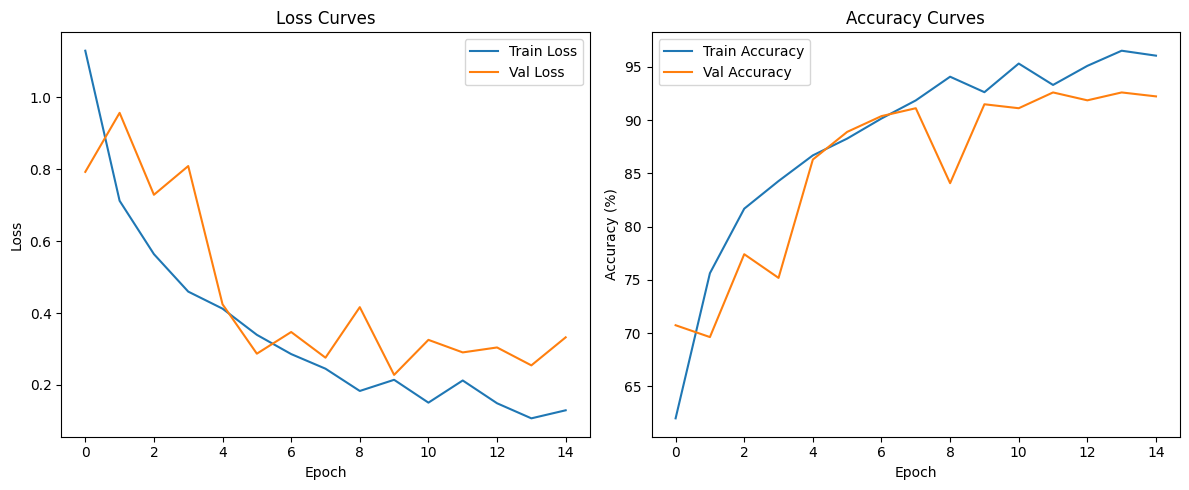

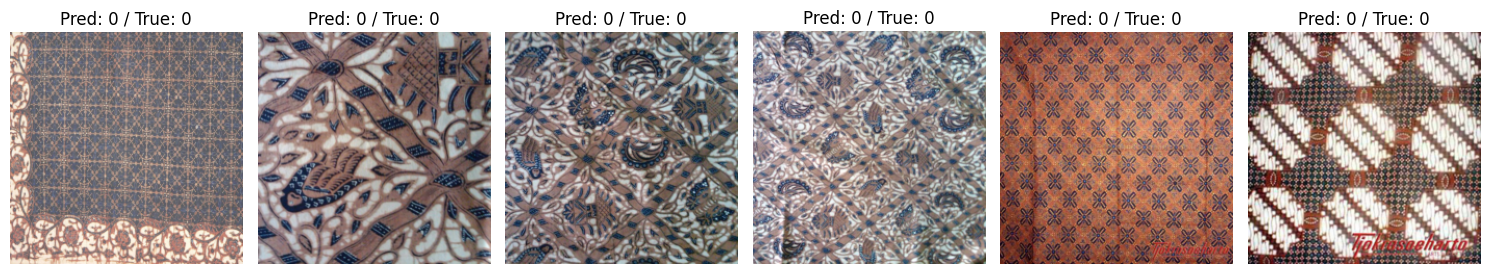

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torchvision.models import ResNet50_Weights
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import os
from tqdm import tqdm
from copy import deepcopy

# Set device - Uses GPU if available, otherwise falls back to CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Hyperparameters configuration
batch_size = 32     # Number of images processed in each training iteration
num_epochs = 50     # Maximum number of complete passes through the training dataset
learning_rate = 0.001  # Step size for optimizer updates
patience = 5        # Number of epochs to wait for improvement before early stopping

# Data directories - paths to the training and test datasets
# Note: this model uses processed_dataset instead of dataset_split/train
train_dir = "/content/drive/MyDrive/kuliah (1)/sem6/analisis citra/resnet50-batik/processed_dataset"
test_dir = "/content/drive/MyDrive/kuliah (1)/sem6/analisis citra/resnet50-batik/test_data"

# Image transformations - preprocessing steps applied to each image
# ResNet50 expects 224x224 pixel images as input
resize_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize all images to 224x224 pixels (ResNet standard input size)
    transforms.ToTensor(),          # Convert PIL images to tensors and normalize pixel values to [0,1]
])

# Create dataset objects - ImageFolder automatically assigns labels based on folder structure
train_dataset = datasets.ImageFolder(root=train_dir, transform=resize_transform)
test_dataset = datasets.ImageFolder(root=test_dir, transform=resize_transform)

# Get the number of available CPU cores for worker configuration
# Use 2 workers as suggested by the warning, or fewer if system has fewer cores
num_workers = min(2, os.cpu_count() or 1)  # Adjust worker count based on warning
print(f"Using {num_workers} worker processes for data loading")

# Create data loaders with appropriate number of workers
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True,
                          num_workers=num_workers, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False,
                         num_workers=num_workers, pin_memory=True)

# Initialize the model - load pre-trained ResNet50 with proper weights syntax
# Using the updated weights parameter instead of the deprecated pretrained parameter
model = models.resnet50(weights=ResNet50_Weights.IMAGENET1K_V1)  # Use explicit weights enum instead of pretrained=True
model.fc = nn.Linear(model.fc.in_features, 6)  # Replace the final fully connected layer for 6 Batik classes
model = model.to(device)  # Move model to GPU or CPU as determined earlier

# Loss function and optimizer configuration
criterion = nn.CrossEntropyLoss()  # Standard loss function for multi-class classification
optimizer = optim.AdamW(model.parameters(), lr=learning_rate)  # AdamW optimizer combines Adam with weight decay

# Initialize tracking variables for training progress
train_losses, val_losses = [], []  # Track loss values for plotting
train_accuracies, val_accuracies = [], []  # Track accuracy values for plotting
best_val_loss = float('inf')  # Initialize best validation loss to infinity
epochs_no_improve = 0  # Counter for early stopping

# Training loop with early stopping mechanism
for epoch in range(num_epochs):
    # Set model to training mode - enables dropout, batch normalization updates, etc.
    model.train()
    running_loss = 0.0
    correct, total = 0, 0  # For accuracy calculation

    # Iterate through mini-batches of training data with progress bar
    for inputs, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
        inputs, labels = inputs.to(device), labels.to(device)  # Move data to current device
        optimizer.zero_grad()  # Clear gradients from previous iteration

        outputs = model(inputs)  # Forward pass - get model predictions
        loss = criterion(outputs, labels)  # Calculate loss between predictions and true labels
        loss.backward()  # Backward pass - calculate gradients
        optimizer.step()  # Update model parameters based on gradients

        # Calculate accuracy statistics
        _, predicted = torch.max(outputs.data, 1)  # Get the index of the max log-probability
        total += labels.size(0)  # Increment total number of processed samples
        correct += (predicted == labels).sum().item()  # Count correct predictions
        running_loss += loss.item()  # Accumulate batch loss

    # Calculate epoch-level training metrics
    train_loss = running_loss / len(train_loader)  # Average loss across all batches
    train_acc = 100 * correct / total  # Accuracy as percentage
    train_losses.append(train_loss)  # Store for plotting
    train_accuracies.append(train_acc)  # Store for plotting

    # Validation phase - evaluate model on test data
    model.eval()  # Set model to evaluation mode - disables dropout, fixes batch norm, etc.
    val_loss, correct, total = 0.0, 0, 0
    with torch.no_grad():  # Disable gradient computation for efficiency
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    # Calculate epoch-level validation metrics
    val_loss /= len(test_loader)  # Average validation loss
    val_acc = 100 * correct / total  # Validation accuracy as percentage
    val_losses.append(val_loss)  # Store for plotting
    val_accuracies.append(val_acc)  # Store for plotting

    # Print progress for current epoch
    print(f"Epoch {epoch+1}: Train Loss={train_loss:.4f}, Val Loss={val_loss:.4f}, Train Acc={train_acc:.2f}%, Val Acc={val_acc:.2f}%")

    # Early stopping logic - save best model and check for improvement
    if val_loss < best_val_loss:
        best_val_loss = val_loss  # Update best validation loss
        best_model_state = deepcopy(model.state_dict())  # Save a deep copy of the model state
        epochs_no_improve = 0  # Reset counter
    else:
        epochs_no_improve += 1  # Increment counter when no improvement
        if epochs_no_improve >= patience:
            print("Early stopping triggered.")  # Stop training if no improvement for 'patience' epochs
            break

# Load the best model weights (state with lowest validation loss)
model.load_state_dict(best_model_state)
torch.save(model.state_dict(), "modelB_best.pth")  # Save best model to disk
print("Model saved as modelB_best.pth")

# Final evaluation on test dataset
model.eval()
correct, total = 0, 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Report final test accuracy
print(f"Final Test Accuracy: {100 * correct / total:.2f}%")

# Visualize training process with plots
plt.figure(figsize=(12, 5))

# Plot loss curves
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curves')
plt.legend()

# Plot accuracy curves
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Curves')
plt.legend()

plt.tight_layout()
plt.show()

# Function to visualize model predictions on test data
def visualize_predictions(loader, n=6):
    """
    Visualizes model predictions alongside ground truth labels

    Args:
        loader: DataLoader containing test data
        n: Number of samples to visualize
    """
    data_iter = iter(loader)  # Create iterator from loader
    images, labels = next(data_iter)  # Get a batch of images and labels
    images = images.to(device)  # Move images to current device
    outputs = model(images)  # Get model predictions
    _, preds = torch.max(outputs, 1)  # Get predicted class indices

    # Create visualization grid
    plt.figure(figsize=(15, 4))
    for i in range(n):
        img = images[i].cpu().permute(1, 2, 0).numpy()  # Convert tensor to numpy for display
        plt.subplot(1, n, i + 1)
        plt.imshow(img)  # Display image
        plt.title(f"Pred: {preds[i].item()} / True: {labels[i].item()}")  # Show prediction vs true label
        plt.axis("off")  # Hide axes
    plt.tight_layout()
    plt.show()

# Call visualization function to show sample predictions
visualize_predictions(test_loader)


#ModelC

Using device: cuda
Using 2 worker processes for data loading


Epoch 1/50: 100%|██████████| 102/102 [00:45<00:00,  2.26it/s]


Epoch 1: Train Loss=1.2626, Val Loss=1.1528, Train Acc=72.32%, Val Acc=70.00%


Epoch 2/50: 100%|██████████| 102/102 [00:43<00:00,  2.32it/s]


Epoch 2: Train Loss=1.0097, Val Loss=1.0481, Train Acc=78.99%, Val Acc=75.19%


Epoch 3/50: 100%|██████████| 102/102 [00:43<00:00,  2.33it/s]


Epoch 3: Train Loss=0.8174, Val Loss=0.4954, Train Acc=85.76%, Val Acc=83.33%


Epoch 4/50: 100%|██████████| 102/102 [00:44<00:00,  2.31it/s]


Epoch 4: Train Loss=0.7648, Val Loss=0.4273, Train Acc=89.31%, Val Acc=86.30%


Epoch 5/50: 100%|██████████| 102/102 [00:44<00:00,  2.30it/s]


Epoch 5: Train Loss=0.7803, Val Loss=0.3517, Train Acc=88.97%, Val Acc=87.41%


Epoch 6/50: 100%|██████████| 102/102 [00:43<00:00,  2.33it/s]


Epoch 6: Train Loss=0.6467, Val Loss=0.2597, Train Acc=91.94%, Val Acc=91.48%


Epoch 7/50: 100%|██████████| 102/102 [00:44<00:00,  2.30it/s]


Epoch 7: Train Loss=0.6666, Val Loss=0.3631, Train Acc=93.85%, Val Acc=88.52%


Epoch 8/50: 100%|██████████| 102/102 [00:43<00:00,  2.32it/s]


Epoch 8: Train Loss=0.6293, Val Loss=0.2672, Train Acc=95.43%, Val Acc=92.96%


Epoch 9/50: 100%|██████████| 102/102 [00:44<00:00,  2.31it/s]


Epoch 9: Train Loss=0.6325, Val Loss=0.3121, Train Acc=95.06%, Val Acc=90.00%


Epoch 10/50: 100%|██████████| 102/102 [00:44<00:00,  2.31it/s]


Epoch 10: Train Loss=0.5133, Val Loss=0.3045, Train Acc=96.82%, Val Acc=90.00%


Epoch 11/50: 100%|██████████| 102/102 [00:43<00:00,  2.33it/s]


Epoch 11: Train Loss=0.4910, Val Loss=0.2247, Train Acc=97.47%, Val Acc=93.70%


Epoch 12/50: 100%|██████████| 102/102 [00:44<00:00,  2.30it/s]


Epoch 12: Train Loss=0.5508, Val Loss=0.2136, Train Acc=97.28%, Val Acc=92.96%


Epoch 13/50: 100%|██████████| 102/102 [00:43<00:00,  2.33it/s]


Epoch 13: Train Loss=0.4960, Val Loss=0.2587, Train Acc=97.90%, Val Acc=92.59%


Epoch 14/50: 100%|██████████| 102/102 [00:44<00:00,  2.32it/s]


Epoch 14: Train Loss=0.5339, Val Loss=0.2650, Train Acc=98.80%, Val Acc=94.81%


Epoch 15/50: 100%|██████████| 102/102 [00:43<00:00,  2.34it/s]


Epoch 15: Train Loss=0.4904, Val Loss=0.2144, Train Acc=98.83%, Val Acc=94.07%


Epoch 16/50: 100%|██████████| 102/102 [00:43<00:00,  2.33it/s]


Epoch 16: Train Loss=0.4405, Val Loss=0.1945, Train Acc=99.10%, Val Acc=95.56%


Epoch 17/50: 100%|██████████| 102/102 [00:44<00:00,  2.28it/s]


Epoch 17: Train Loss=0.3830, Val Loss=0.1739, Train Acc=99.35%, Val Acc=94.81%


Epoch 18/50: 100%|██████████| 102/102 [00:43<00:00,  2.33it/s]


Epoch 18: Train Loss=0.4663, Val Loss=0.1976, Train Acc=98.92%, Val Acc=95.19%


Epoch 19/50: 100%|██████████| 102/102 [00:43<00:00,  2.32it/s]


Epoch 19: Train Loss=0.4569, Val Loss=0.2405, Train Acc=99.14%, Val Acc=93.70%


Epoch 20/50: 100%|██████████| 102/102 [00:43<00:00,  2.32it/s]


Epoch 20: Train Loss=0.4574, Val Loss=0.1889, Train Acc=99.04%, Val Acc=95.19%


Epoch 21/50: 100%|██████████| 102/102 [00:43<00:00,  2.35it/s]


Epoch 21: Train Loss=0.4093, Val Loss=0.1961, Train Acc=99.17%, Val Acc=94.07%


Epoch 22/50: 100%|██████████| 102/102 [00:44<00:00,  2.29it/s]


Epoch 22: Train Loss=0.3958, Val Loss=0.1791, Train Acc=99.44%, Val Acc=94.81%
Early stopping triggered.
Model saved as modelC_best.pth
Final Test Accuracy: 94.81%


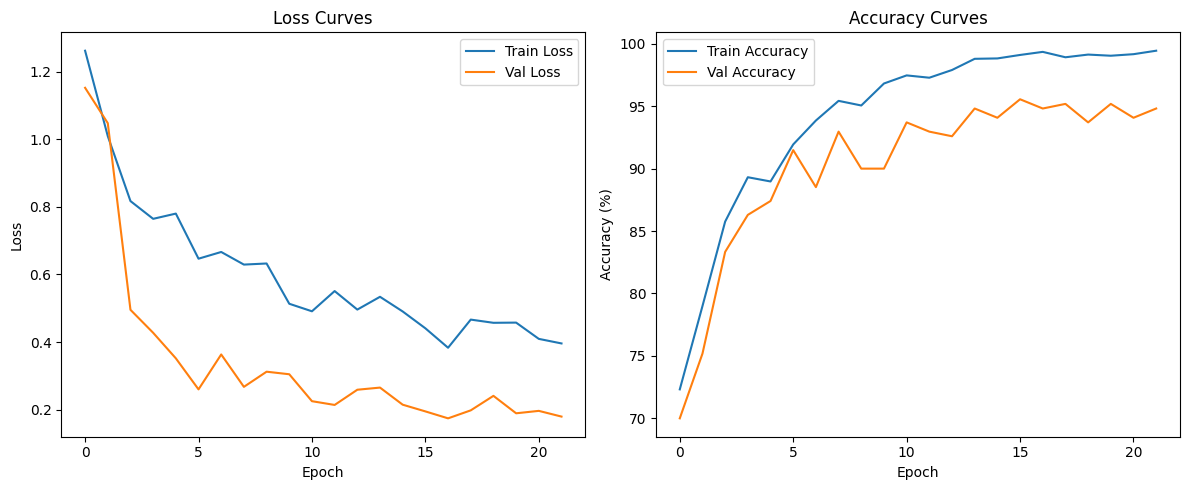

Visualizing model predictions:


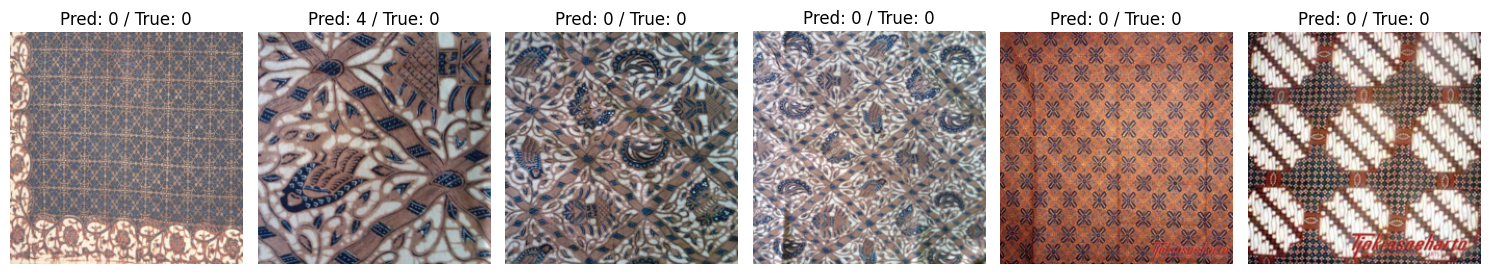

Visualizing mixup examples:


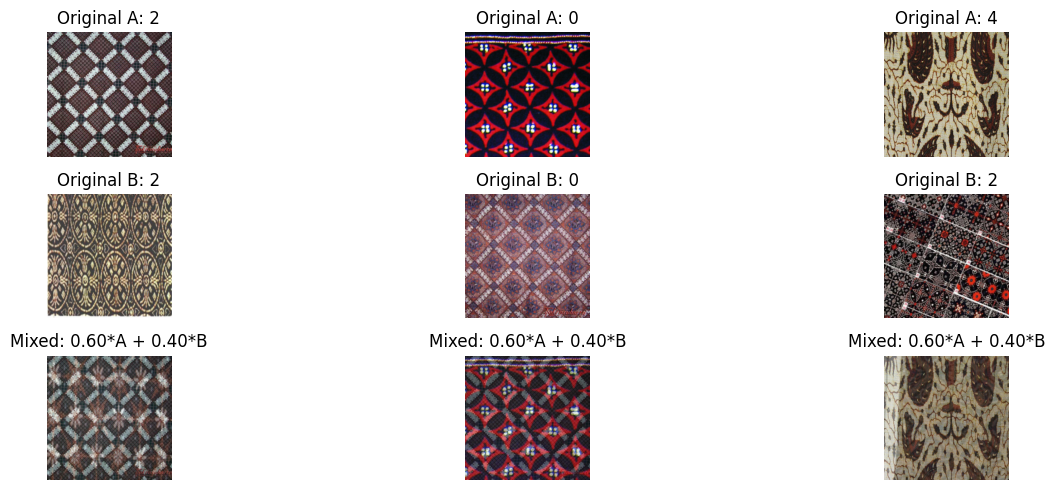

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torchvision.models import ResNet50_Weights
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import os
from tqdm import tqdm
from copy import deepcopy

# Set device - Uses GPU if available, otherwise falls back to CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Hyperparameters configuration
batch_size = 32       # Number of images processed in each training iteration
num_epochs = 50       # Maximum number of complete passes through the training dataset
learning_rate = 0.001 # Step size for optimizer updates
patience = 5          # Early stopping patience
alpha = 0.2           # Mixup alpha parameter - controls strength of interpolation

# Data directories - paths to the training and test datasets
train_dir = "/content/drive/MyDrive/kuliah (1)/sem6/analisis citra/resnet50-batik/processed_dataset"
test_dir = "/content/drive/MyDrive/kuliah (1)/sem6/analisis citra/resnet50-batik/test_data"

# Image transformations - preprocessing steps applied to each image
resize_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize all images to 224x224 pixels (ResNet standard input size)
    transforms.ToTensor(),          # Convert PIL images to tensors and normalize pixel values to [0,1]
])

# Create dataset objects - ImageFolder automatically assigns labels based on folder structure
train_dataset = datasets.ImageFolder(root=train_dir, transform=resize_transform)
test_dataset = datasets.ImageFolder(root=test_dir, transform=resize_transform)

# Get the number of available CPU cores for worker configuration
num_workers = min(2, os.cpu_count() or 1)  # Adjust worker count based on warning
print(f"Using {num_workers} worker processes for data loading")

# Create data loaders with appropriate number of workers
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True,
                          num_workers=num_workers, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False,
                         num_workers=num_workers, pin_memory=True)

# Initialize the model - load pre-trained ResNet50 with proper weights syntax
model = models.resnet50(weights=ResNet50_Weights.IMAGENET1K_V1)  # Use explicit weights enum instead of pretrained=True
model.fc = nn.Linear(model.fc.in_features, 6)  # Replace the final fully connected layer for 6 Batik classes
model = model.to(device)  # Move model to GPU or CPU as determined earlier

# Loss function and optimizer configuration
criterion = nn.CrossEntropyLoss()  # Standard loss function for multi-class classification
optimizer = optim.AdamW(model.parameters(), lr=learning_rate)  # AdamW optimizer combines Adam with weight decay

# Initialize tracking variables for training progress
train_losses, val_losses = [], []  # Track loss values for plotting
train_accuracies, val_accuracies = [], []  # Track accuracy values for plotting
best_val_loss = float('inf')  # Initialize best validation loss to infinity
epochs_no_improve = 0  # Counter for early stopping

# Define mixup function
def mixup_data(x, y, alpha=0.2):
    """
    Applies mixup augmentation to batch of data

    Args:
        x: batch of images (tensor)
        y: batch of labels (tensor)
        alpha: mixup interpolation strength

    Returns:
        mixed_x: mixed batch of images
        y_a: first batch of labels
        y_b: second batch of labels
        lam: lambda value for interpolation
    """
    # Generate mixup interpolation coefficient
    if alpha > 0:
        lam = np.random.beta(alpha, alpha)
    else:
        lam = 1  # If alpha <= 0, no mixup is applied

    # Ensure lam is compatible with PyTorch tensors
    lam = max(lam, 1-lam)

    batch_size = x.size()[0]

    # Create shuffled indices for mixing
    index = torch.randperm(batch_size).to(device)

    # Mix images and preserve corresponding labels
    mixed_x = lam * x + (1 - lam) * x[index, :]
    y_a, y_b = y, y[index]

    return mixed_x, y_a, y_b, lam

# Define mixup loss function
def mixup_criterion(criterion, pred, y_a, y_b, lam):
    """
    Calculates the mixup loss

    Args:
        criterion: loss function
        pred: model predictions
        y_a: first batch of labels
        y_b: second batch of labels
        lam: lambda value for interpolation

    Returns:
        Weighted loss according to mixup formula
    """
    return lam * criterion(pred, y_a) + (1 - lam) * criterion(pred, y_b)

# Training loop with early stopping mechanism and mixup
for epoch in range(num_epochs):
    # Set model to training mode - enables dropout, batch normalization updates, etc.
    model.train()
    running_loss = 0.0
    correct, total = 0, 0  # For accuracy calculation

    # Iterate through mini-batches of training data with progress bar
    for inputs, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
        inputs, labels = inputs.to(device), labels.to(device)  # Move data to current device

        # Apply mixup to current batch
        inputs_mixed, labels_a, labels_b, lam = mixup_data(inputs, labels, alpha)

        optimizer.zero_grad()  # Clear gradients from previous iteration

        outputs = model(inputs_mixed)  # Forward pass with mixed images

        # Calculate mixup loss
        loss = mixup_criterion(criterion, outputs, labels_a, labels_b, lam)

        loss.backward()  # Backward pass - calculate gradients
        optimizer.step()  # Update model parameters based on gradients

        # For accuracy calculation, we use the original images (not mixed) for a clearer metric
        with torch.no_grad():
            outputs_original = model(inputs)
            _, predicted = torch.max(outputs_original.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        running_loss += loss.item()  # Accumulate batch loss

    # Calculate epoch-level training metrics
    train_loss = running_loss / len(train_loader)  # Average loss across all batches
    train_acc = 100 * correct / total  # Accuracy as percentage
    train_losses.append(train_loss)  # Store for plotting
    train_accuracies.append(train_acc)  # Store for plotting

    # Validation phase - evaluate model on test data
    model.eval()  # Set model to evaluation mode - disables dropout, fixes batch norm, etc.
    val_loss, correct, total = 0.0, 0, 0
    with torch.no_grad():  # Disable gradient computation for efficiency
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)  # Standard loss for validation (no mixup)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    # Calculate epoch-level validation metrics
    val_loss /= len(test_loader)  # Average validation loss
    val_acc = 100 * correct / total  # Validation accuracy as percentage
    val_losses.append(val_loss)  # Store for plotting
    val_accuracies.append(val_acc)  # Store for plotting

    # Print progress for current epoch
    print(f"Epoch {epoch+1}: Train Loss={train_loss:.4f}, Val Loss={val_loss:.4f}, Train Acc={train_acc:.2f}%, Val Acc={val_acc:.2f}%")

    # Early stopping logic - save best model and check for improvement
    if val_loss < best_val_loss:
        best_val_loss = val_loss  # Update best validation loss
        best_model_state = deepcopy(model.state_dict())  # Save a deep copy of the model state
        epochs_no_improve = 0  # Reset counter
    else:
        epochs_no_improve += 1  # Increment counter when no improvement
        if epochs_no_improve >= patience:
            print("Early stopping triggered.")  # Stop training if no improvement for 'patience' epochs
            break

# Load the best model weights (state with lowest validation loss)
model.load_state_dict(best_model_state)
torch.save(model.state_dict(), "modelC_best.pth")  # Save best model to disk
print("Model saved as modelC_best.pth")

# Final evaluation on test dataset
model.eval()
correct, total = 0, 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Report final test accuracy
print(f"Final Test Accuracy: {100 * correct / total:.2f}%")

# Visualize training process with plots
plt.figure(figsize=(12, 5))

# Plot loss curves
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curves')
plt.legend()

# Plot accuracy curves
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Curves')
plt.legend()

plt.tight_layout()
plt.show()

# Function to visualize model predictions on test data
def visualize_predictions(loader, n=6):
    """
    Visualizes model predictions alongside ground truth labels

    Args:
        loader: DataLoader containing test data
        n: Number of samples to visualize
    """
    data_iter = iter(loader)  # Create iterator from loader
    images, labels = next(data_iter)  # Get a batch of images and labels
    images = images.to(device)  # Move images to current device
    outputs = model(images)  # Get model predictions
    _, preds = torch.max(outputs, 1)  # Get predicted class indices

    # Create visualization grid
    plt.figure(figsize=(15, 4))
    for i in range(n):
        img = images[i].cpu().permute(1, 2, 0).numpy()  # Convert tensor to numpy for display
        plt.subplot(1, n, i + 1)
        plt.imshow(img)  # Display image
        plt.title(f"Pred: {preds[i].item()} / True: {labels[i].item()}")  # Show prediction vs true label
        plt.axis("off")  # Hide axes
    plt.tight_layout()
    plt.show()

# Optional: Visualize mixup examples
def visualize_mixup_examples(loader, alpha=0.2, n=3):
    """
    Visualizes examples of mixup-augmented images

    Args:
        loader: DataLoader containing test data
        alpha: Mixup alpha parameter
        n: Number of examples to visualize
    """
    data_iter = iter(loader)
    images, labels = next(data_iter)
    images, labels = images.to(device), labels.to(device)

    # Apply mixup
    mixed_images, labels_a, labels_b, lam = mixup_data(images, labels, alpha)

    plt.figure(figsize=(15, 5))
    for i in range(n):
        # Original image A
        plt.subplot(3, n, i+1)
        img_a = images[i].cpu().permute(1, 2, 0).numpy()
        plt.imshow(img_a)
        plt.title(f"Original A: {labels[i].item()}")
        plt.axis("off")

        # Original image B (the one mixed with A)
        idx = torch.randperm(len(images))[i].item()
        plt.subplot(3, n, i+1+n)
        img_b = images[idx].cpu().permute(1, 2, 0).numpy()
        plt.imshow(img_b)
        plt.title(f"Original B: {labels[idx].item()}")
        plt.axis("off")

        # Mixed image
        plt.subplot(3, n, i+1+2*n)
        mixed_img = mixed_images[i].cpu().detach().permute(1, 2, 0).numpy()
        plt.imshow(mixed_img)
        plt.title(f"Mixed: {lam:.2f}*A + {1-lam:.2f}*B")
        plt.axis("off")

    plt.tight_layout()
    plt.show()

# Call visualization functions
print("Visualizing model predictions:")
visualize_predictions(test_loader)

print("Visualizing mixup examples:")
visualize_mixup_examples(train_loader, alpha=alpha)